In [1]:
import tensorflow
from tensorflow.keras.models import load_model
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
from tensorflow.keras.layers import Input, Activation


2023-03-16 11:39:19.763491: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
from qkeras import *

In [3]:
#savedModel=load_model('my_model.h5')
savedModel = tf.keras.models.load_model('/home/jieun201/dataset9_QKeras/my_model.tf')#, custom_objects={'CustomModel': CustomModel})
savedModel.summary()

2023-03-16 11:39:25.766400: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-16 11:39:25.795649: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-16 11:39:25.795922: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-16 11:39:25.796723: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropri

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 14)]              0         
                                                                 
 dense1 (QDense)             (None, 128)               1920      
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 relu-1 (QActivation)        (None, 128)               0         
                                                                 
 dense2 (QDense)             (None, 3)                 387       
                                                                 
 softmax (Activation)        (None, 3)                 0         
                                                             

In [4]:
#df3 = pd.read_csv('QuantizedInputTestSet.csv')
df3 = pd.read_csv('/uscms/home/jieun201/nobackup/YOURWORKINGAREA/jan2_finalDS/QuantizedTestSet.csv')
df3

,0,1,2,3,4,5,6,7,8,9,10,11,12,y-local
0,0,0,0,3,5,3,5,5,0,0,0,0,0,7
1,0,0,1,3,3,5,3,3,0,0,0,0,0,0
2,0,0,0,1,4,3,3,3,1,0,0,0,0,6
3,0,0,2,2,2,1,0,0,0,0,0,0,0,29
4,0,0,0,0,1,20,15,0,0,0,0,0,0,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163035,0,0,0,1,2,2,1,0,0,0,0,0,0,33
163036,0,0,0,0,0,30,17,0,0,0,0,0,0,39
163037,0,0,0,3,3,0,0,0,0,0,0,0,0,39
163038,0,0,0,0,0,0,23,6,0,0,0,0,0,58


In [5]:
X_test = df3.values

In [6]:
scaler = StandardScaler()
X_test = scaler.fit_transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)

In [7]:
#savedModel.predict(X_test)

In [8]:
preds = savedModel.predict(X_test) 
predictionsFiles =np.argmax(preds, axis=1)

 132/5095 [..............................] - ETA: 5s 

2023-03-16 11:39:27.838226: I tensorflow/stream_executor/cuda/cuda_blas.cc:1614] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


5095/5095 [==============================] - 6s 1ms/step


In [9]:
pd.DataFrame(predictionsFiles).to_csv("predictionsFiles.csv",header='predict', index=False)

In [10]:
readPredictions = pd.read_csv('predictionsFiles.csv')
readPredictions

,0
0,0
1,0
2,0
3,2
4,0
...,...
163035,2
163036,1
163037,1
163038,0


array([[<Axes: title={'center': '0'}>]], dtype=object)

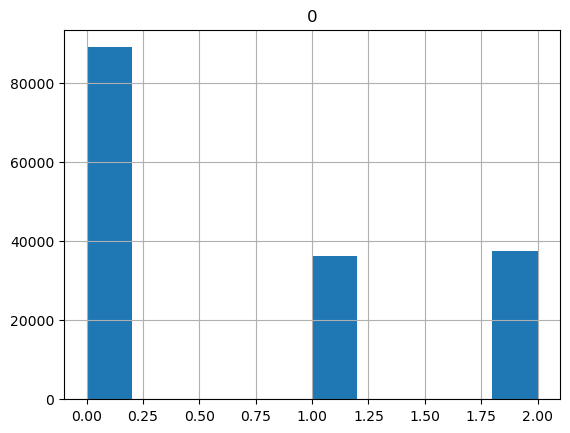

In [11]:
readPredictions.hist()

In [12]:

readPredictions.value_counts()[1]

36352

In [13]:
readPredictions.value_counts()[2]

37561

In [14]:
readPredictions.value_counts()[0]

89127

In [15]:
75381+62344

137725

In [16]:
readPredictions.value_counts()[1]+readPredictions.value_counts()[2]

73913

In [17]:
137725+108368

246093